### Q1.
##### Is DELTA delivering beta or alpha?

##### According to the case, AQR's DELTA strategy was designed to be uncorrelated with the overall market, meaning its not a beta strategy. Morevoer, one of the strategies that AQR's DELTA employed is merger-aritragy strategy, that seeks alpha via a long-short combination of the two MMA counterparts. Therefore, we can think of DELTA as a strategy that combine varous alpha seeking strategies to deliver alpha.


### Q2.
##### How might it cannibalize AQR’s existing business?

##### In a high level, i think AQR's existing business should be a complement to their new DELTA strategy.
##### First, AQR's existing business are similar to many other competitors' strategy that focusing on a Top-down or funds of fund approach. Therefore, the fee constructions and institutional investors marketing pool would be different from what they want to attract for the DELTA strategy, Second, related to what I answered in question 1, they are seeking alpha instead of beta which is more of a high level difference bewteen the two approaches. Consequently, this leads me to conclude that it would not cannibalize AQR's existing strategy.
##### On the other hand, if AQR does not provide a clear guideline to its current and potential future investors on which strategy would be better play based on their investors' levels of risk reversion, then it would be difficult for their investors to differentiate DELTA strategy from their existing business, which could lead to a cannibalization.  For example, institutional investors with less than 100M source of funds would be better to stick with their current investing strategy since a 2% management fee with additional 20% performance fee according to the article, whereas investors with 500M and above would be better suit for their DELTA strategy because it decreazes the management fee to 1% while charging additional 10% instead of 20% performance fee, for institutional investors of this size, this is a huge amount of investment cost relative to their tradtional approach. 

##### Overall, my ansder to the question is it really depends on how AQR wants to set up the play, and if it has done properly, it could be a great complment instead of a substitution for their existing business.

### Q3.
##### Using Exhibit 8, how has DELTA done vs HFRI and S&P 500? Compute mean return (calculate t-test mean differences of returns), volatility, Sharpe Ratio, and correlations of DELTA with the index, for the whole period as well as two sub-periods (2008-9 and 2009-11).

In [2]:
import pandas as pd
import numpy as np
import math
import plotly.express as px 
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pypfopt
from pypfopt import risk_models, expected_returns, plotting
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import objective_functions
from pypfopt.plotting import plot_weights
from scipy.stats import ttest_ind
import copy



In [62]:
df_3 = pd.read_csv("Q3.csv", index_col="Date")
df_3.head(5)

,DELTA,NASDAQ,S&P_Index,DJCS_Hedge,HFRI_FW
Date,,,,,
200810,0.0122,-0.1773,-0.1694,-0.0630,-0.0684
200811,0.0172,-0.1077,-0.0748,-0.0415,-0.0267
200812,0.0405,0.0270,0.0078,-0.0003,0.0015
200901,0.0279,-0.0638,-0.0857,0.0109,-0.0009
200902,-0.0010,-0.0668,-0.1099,-0.0088,-0.0121


In [36]:
#df_m = df_m.drop(['Year','Month'], axis=1)


### Overall Period vs 2008-2009 vs 2010-2011

#### Mean

In [64]:
df_3.mean(),df_3.loc['200810':'200912'].mean(),df_3.loc['201001':].mean()

(DELTA         0.013206
 NASDAQ        0.011922
 S&P_Index     0.006441
 DJCS_Hedge    0.006378
 HFRI_FW       0.006606
 dtype: float64,
 DELTA         0.017887
 NASDAQ        0.008800
 S&P_Index    -0.000040
 DJCS_Hedge    0.004520
 HFRI_FW       0.006127
 dtype: float64,
 DELTA         0.009076
 NASDAQ        0.014676
 S&P_Index     0.012159
 DJCS_Hedge    0.008018
 HFRI_FW       0.007029
 dtype: float64)

### Volatility(standard deviation)

In [65]:
df_3.std(),df_3.loc['200810':'200912'].std(),df_3.loc['201001':].std()

(DELTA         0.016355
 NASDAQ        0.069193
 S&P_Index     0.062625
 DJCS_Hedge    0.021050
 HFRI_FW       0.022329
 dtype: float64,
 DELTA         0.014948
 NASDAQ        0.083334
 S&P_Index     0.077737
 DJCS_Hedge    0.026592
 HFRI_FW       0.028258
 dtype: float64,
 DELTA         0.016855
 NASDAQ        0.056413
 S&P_Index     0.047295
 DJCS_Hedge    0.015286
 HFRI_FW       0.016336
 dtype: float64)

####  Sharpe Ratio

In [66]:
df_3.mean()/df_3.std(),df_3.loc['200810':'200912'].mean()/df_3.loc['200810':'200912'].std(),df_3.loc['201001':].mean()/df_3.loc['201001':].std()

(DELTA         0.807465
 NASDAQ        0.172299
 S&P_Index     0.102845
 DJCS_Hedge    0.303000
 HFRI_FW       0.295862
 dtype: float64,
 DELTA         1.196623
 NASDAQ        0.105600
 S&P_Index    -0.000515
 DJCS_Hedge    0.169973
 HFRI_FW       0.216812
 dtype: float64,
 DELTA         0.538489
 NASDAQ        0.260160
 S&P_Index     0.257085
 DJCS_Hedge    0.524525
 HFRI_FW       0.430289
 dtype: float64)

#### Correlation

In [67]:
df_3.corr(),df_3.loc['200810':'200912'].corr(),df_3.loc['201001':].corr()

(               DELTA    NASDAQ  S&P_Index  DJCS_Hedge   HFRI_FW
 DELTA       1.000000  0.376874   0.341190    0.318443  0.347317
 NASDAQ      0.376874  1.000000   0.962625    0.819939  0.878331
 S&P_Index   0.341190  0.962625   1.000000    0.826514  0.889968
 DJCS_Hedge  0.318443  0.819939   0.826514    1.000000  0.959787
 HFRI_FW     0.347317  0.878331   0.889968    0.959787  1.000000,
                DELTA    NASDAQ  S&P_Index  DJCS_Hedge   HFRI_FW
 DELTA       1.000000  0.256406   0.246032    0.081474  0.086705
 NASDAQ      0.256406  1.000000   0.955908    0.794010  0.862710
 S&P_Index   0.246032  0.955908   1.000000    0.792046  0.876799
 DJCS_Hedge  0.081474  0.794010   0.792046    1.000000  0.952943
 HFRI_FW     0.086705  0.862710   0.876799    0.952943  1.000000,
                DELTA    NASDAQ  S&P_Index  DJCS_Hedge   HFRI_FW
 DELTA       1.000000  0.602242   0.602697    0.774021  0.790469
 NASDAQ      0.602242  1.000000   0.984852    0.885992  0.921199
 S&P_Index   0.602697  

### Q4.
##### Using the complete period of analysis of Exhibit 3, how much could HFRI replication (HFRI equity hedge (total)) charge in fees before falling below S&P 500 Sharpe ratio?

In [235]:
df_4 = pd.read_csv("Q4.csv", index_col="Date_")
df_4=df_4.drop(columns=['Year','Month','Date'],axis=1)
test = df_4[['HFRI EQUITY HEDGE (TOTAL) - TOT RETURN IND','S&P 500 COMPOSITE - TOT RETURN IND']]
test=test.rename(columns={"HFRI EQUITY HEDGE (TOTAL) - TOT RETURN IND": "HFRI", "S&P 500 COMPOSITE - TOT RETURN IND": "SP500"})
test.head(5)

,HFRI,SP500
Date_,,
19960131,0.010601,0.034039
19960229,0.028199,0.009267
19960329,0.019001,0.009630
19960430,0.053400,0.014738
19960531,0.036999,0.025790


In [390]:
result_0 = pd.DataFrame(columns = ['Year', 'HFRI', 'SP500', 'HFRI_SR','SP500_SR'])
years = [1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012]

for i in range(len(years)):
    indx2 = test.iloc[12*i:12*i+11]
    result_0 = result_0.append({'Year' : years[i],
                            'HFRI' : indx2['HFRI'].mean(),
                            'SP500' : indx2['SP500'].mean(), 
                            'HFRI_SR' : indx2['HFRI'].mean()/indx2['HFRI'].std(),
                            'SP500_SR' : indx2['SP500'].mean()/indx2['SP500'].std()},ignore_index = True)
    
result_0['Year']= result_0['Year'].astype('int')
result_0.set_index('Year')

,HFRI,SP500,HFRI_SR,SP500_SR
Year,,,,
1996,0.017500,0.021241,0.808674,0.696099
1997,0.018273,0.025983,0.735850,0.539080
1998,0.009309,0.019880,0.267140,0.310250
1999,0.024527,0.012852,0.889993,0.345922
2000,0.005982,-0.007879,0.133434,-0.152124
2001,-0.001200,-0.010582,-0.053733,-0.176823
2002,-0.003168,-0.015335,-0.163362,-0.250889
2003,0.015460,0.018928,1.035323,0.574099
2004,0.005271,0.006560,0.321955,0.320182


In [389]:
result_1 = pd.DataFrame(columns = ['Year', 'HFRI', 'SP500', 'Net-of-fee HFRI', 'HFRI_SR','SP500_SR', 'Net-of-fee HFRI_SR'])
years = [1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012]

for i in  range(len(years)):
    indx = (((1 + test.iloc[12*i:12*i+11]).cumprod() - 1)[-1:])
    indx2 = test.iloc[12*i:12*i+11]
    result_1 = result_1.append({'Year' : years[i],
                            'HFRI' : indx['HFRI'].values[0],
                            'SP500' : indx['SP500'].values[0], 
                            'Net-of-fee HFRI': (indx['SP500'].values[0]-0.02)*(0.8),
                            'HFRI_SR' : indx['HFRI'].values[0]/indx2['HFRI'].std() * math.sqrt(12),
                            'SP500_SR' : indx['SP500'].values[0]/indx2['SP500'].std() * math.sqrt(12),
                            'Net-of-fee HFRI_SR': (indx['SP500'].values[0]-0.02)*(0.8)/indx2['SP500'].std() * math.sqrt(12)
                           },ignore_index = True)
result_1['Year']= result_1['Year'].astype('int')
result_1.set_index('Year')

,HFRI,SP500,Net-of-fee HFRI,HFRI_SR,SP500_SR,Net-of-fee HFRI_SR
Year,,,,,,
1996,0.207504,0.254457,0.187566,33.216023,28.887504,21.293585
1997,0.216808,0.311110,0.232888,30.244970,22.360026,16.738073
1998,0.100516,0.215734,0.156587,9.992158,11.663114,8.465493
1999,0.300719,0.143089,0.098471,37.799751,13.341130,9.181118
2000,0.057481,-0.095469,-0.092375,4.441753,-6.385102,-6.178189
2001,-0.015591,-0.126508,-0.117206,-2.418393,-7.322832,-6.784418
2002,-0.036136,-0.172386,-0.153909,-6.454873,-9.769744,-8.722571
2003,0.182556,0.222720,0.162176,42.349825,23.401184,17.039827
2004,0.058127,0.072332,0.041865,12.299162,12.230219,7.078817


### Q5.
##### Using Exhibit 10 from the case, calculate the average annual return (gross and net of fees (management + performance)) for each fund. How large is the average gap, and what does this gap depend on? You can calculate each year the equal-weighted average of the 10 hedge funds’ gross and net returns. You can compare gross returns with net returns after fees of 1% of profits & 10% assets under management (AUM) and 2% of profits & 20% AUM fees.

In [387]:
df_5 = pd.read_csv("Q5.csv", index_col="Fund Name")
lists = list(df_5.index)
main = pd.DataFrame(columns = ['Fund Name','Avg Annual Return', 'Net-of-Fees Annual Return (Current)', 'Gap (Current)', 'Net-of-Fees Annual Return (DELTA)', 'Gap (DELTA)'])


In [388]:
for i in range(len(lists)):
    mean = df_6.iloc[:,1:].mean(axis=1)
    main = main.append({'Fund Name' : lists[i],
                            'Avg Annual Return' : mean[i],
                            'Net-of-Fees Annual Return (Current)' : (mean[i]-0.02)*(0.8), 
                            'Gap (Current)': mean[i]-(mean[i]-0.02)*(0.8),
                            'Net-of-Fees Annual Return (DELTA)' : (mean[i]-0.01)*(0.9), 
                            'Gap (DELTA)': mean[i]-(mean[i]-0.01)*(0.9),
                           },ignore_index = True)
main.set_index('Fund Name')

,Avg Annual Return,Net-of-Fees Annual Return (Current),Gap (Current),Net-of-Fees Annual Return (DELTA),Gap (DELTA)
Fund Name,,,,,
Winton Futures USD Cls B,0.144061,0.099249,0.044812,0.120655,0.023406
Millennium International Ltd,0.112766,0.074213,0.038553,0.092489,0.020277
Transtrend DTP - Enhanced Risk (USD),0.126047,0.084837,0.041209,0.104442,0.021605
The Genesis Emerging Mkts Invt Com A,0.224571,0.163657,0.060914,0.193114,0.031457
Aspect Diversified Programme,0.104478,0.067582,0.036896,0.085030,0.019448
Aurora Offshore Fund Ltd.,0.061189,0.032951,0.028238,0.046070,0.015119
Permal Macro Holdings Ltd USD A,0.069930,0.039944,0.029986,0.053937,0.015993
Canyon Value Realization Cayman Ltd A,0.108106,0.070485,0.037621,0.088296,0.019811
Permal Fixed Income Holdings NV USD A,0.081409,0.049127,0.032282,0.064268,0.017141


In [391]:
List1 = ['Average FOFs'] +  df_5.iloc[:,2:].mean().tolist()
List2 = ['Net-of-Fees Annual Return (Current)'] +  ((df_5.iloc[:,2:].mean()-0.02)*(0.8)).tolist()
List3 = ['Gap (Current)'] +  (df_5.iloc[:,2:].mean()-(df_5.iloc[:,2:].mean()-0.02)*(0.8)).tolist()
List4 = ['Net-of-Fees Annual Return (DELTA)'] +  ((df_5.iloc[:,2:].mean()-0.01)*(0.9)).tolist()
List5 = ['Gap (DELTA)'] +  (df_5.iloc[:,2:].mean()-(df_5.iloc[:,2:].mean()-0.01)*(0.9)).tolist()
Data = [List1,List2,List3,List4,List5]

yearlist = list(df_5.iloc[:,2:].mean().index)
total = ['Returns'] + yearlist
main_2 = pd.DataFrame(columns = total,data = Data)
main_2.set_index('Returns')

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Returns,,,,,,,,,,,
Average FOFs,0.166783,0.119321,0.179219,0.093675,0.090917,0.130950,0.123649,-0.038843,0.200249,0.100938,-0.022254
Net-of-Fees Annual Return (Current),0.117427,0.079456,0.127375,0.058940,0.056734,0.088760,0.082919,-0.047074,0.144199,0.064751,-0.033803
Gap (Current),0.049357,0.039864,0.051844,0.034735,0.034183,0.042190,0.040730,0.008231,0.056050,0.036188,0.011549
Net-of-Fees Annual Return (DELTA),0.141105,0.098389,0.152297,0.075307,0.072825,0.108855,0.102284,-0.043959,0.171224,0.081845,-0.029029
Gap (DELTA),0.025678,0.020932,0.026922,0.018367,0.018092,0.022095,0.021365,0.005116,0.029025,0.019094,0.006775


### Q6.
##### 6.	Build a deep learning model, preferably a recurrent neural network model, to forecast the expected return of the 10 indexes in a single model.  

In [211]:
df_6 = pd.read_csv("Q4.csv", index_col="Date_")
df_6=df_6.drop(columns=['Year','Month','Date'],axis=1)

df_6=df_6.rename(columns={"HFRI EQUITY HEDGE (TOTAL) - TOT RETURN IND": "HFRI_T"})
df_6=df_6.rename(columns={"HFRI FUND OF FUNDS COMPOSITE - TOT RETURN IND": "HFRI_F0Fs"})
df_6=df_6.rename(columns={"HFRI FUND WEIGHTED HEDGE FUND - TOT RETURN IND": "HFRI_W"})
df_6=df_6.rename(columns={"MSCI EM - TOT RETURN IND": "MSCI_EM"})
df_6=df_6.rename(columns={"MSCI EAFE - TOT RETURN IND": "MSCI_EAFE"})
df_6=df_6.rename(columns={"RUSSELL 2000 - PRICE INDEX": "RUS2000"})
df_6=df_6.rename(columns={"S&P 500 COMPOSITE - TOT RETURN IND": "SP500"})
df_6=df_6.rename(columns={"BARCLAYS US TREASURY BELLWETHERS 2Y - TOTAL RETURN MTD": "BAR_2Y"})
df_6=df_6.rename(columns={"BARCLAYS US TREASURY BELLWETHERS 10Y - TOTAL RETURN MTD": "BAR_10Y"})
df_6=df_6.rename(columns={"Barclay Currency Traders Index - TOT RETURN IND": "BAR_CUR"})
data = df_6
cols = list(df_6.columns)

In [212]:
def lag(lag):
    cools = []
    for i in range(len(cols)):
        col = f'{cols[i]}_{lag}'
        data[col] = data[cols[i]].shift(lag)
        cools.append(col)
    data.dropna(inplace=True)
    return data

In [213]:
lags = 10
for i in range(1, lags + 1): 
    lag(i)    

In [214]:
colf  = list(data.columns[10:])


In [215]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
import random

In [216]:
optimizer = Adam(learning_rate=0.0001)

In [217]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(100)
    

In [218]:
set_seeds()
model = Sequential()
model.add(Dense(32, activation='relu',
        input_shape=(len(colf),)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # <5>
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [219]:
cutoff = '19991231'
data.index[:47]
data.loc[data.index[:47]]
training_data = data.loc[data.index[:47]].copy()
mu, std = training_data.mean(), training_data.std()
training_data_ = (training_data - mu) / std
test_data = data.loc[data.index[47:47+12]].copy()
test_data_ = (test_data - mu) / std

In [220]:
training_data['Direction'] = np.where(training_data['HFRI_T'] > 0, 1, 0)
test_data['Direction'] = np.where(test_data['HFRI_T'] > 0, 1, 0)


In [221]:
%%time
model.fit(training_data_[colf],
          training_data['Direction'],
          epochs=50, verbose=False,
          validation_split=0.2, shuffle=False)

Wall time: 1.11 s


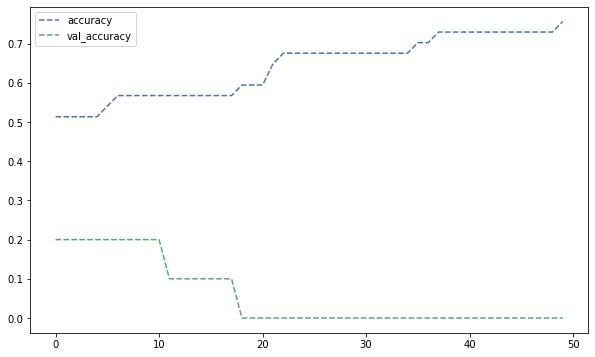

In [222]:
res = pd.DataFrame(model.history.history)
res[['accuracy', 'val_accuracy']].plot(figsize=(10, 6), style='--');


In [223]:
model.evaluate(training_data_[colf], training_data['Direction'])

2/2 [==============================] - 0s 2ms/step - loss: 0.6444 - accuracy: 0.5957


[0.644412100315094, 0.5957446694374084]

In [224]:
pred = (model.predict(training_data_[colf]) > 0.5).astype("int32")


In [237]:
pred

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0]])

In [225]:
training_data['prediction'] = np.where(pred > 0, 1, -1)


In [226]:
training_data['strategy'] = (training_data['prediction'] *
                            training_data['HFRI_T'])

In [227]:
training_data[['HFRI_T', 'strategy']].sum().apply(np.exp)

HFRI_T      1.201043
strategy    1.276693
dtype: float64

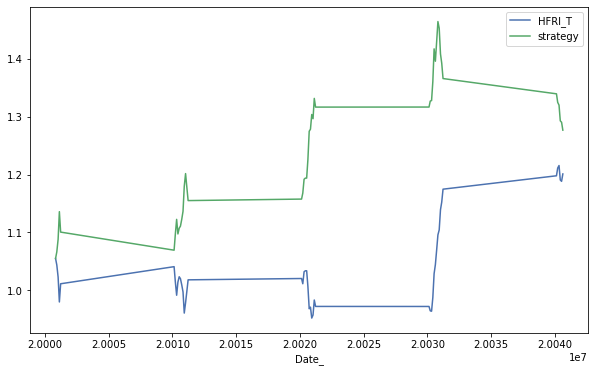

In [228]:
training_data[['HFRI_T', 'strategy']].cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));

In [229]:
model.evaluate(test_data_[colf], test_data['Direction'])

1/1 [==============================] - 0s 13ms/step - loss: 0.7040 - accuracy: 0.5833


[0.7040066123008728, 0.5833333134651184]

In [230]:
pred = (model.predict(test_data_[colf]) > 0.5).astype("int32")


In [231]:
test_data['prediction'] = np.where(pred > 0, 1, -1)

In [232]:
test_data['prediction'].value_counts()

-1    6
 1    6
Name: prediction, dtype: int64

In [233]:
test_data['strategy'] = (test_data['prediction'] *
                        test_data['HFRI_T'])

In [234]:
test_data[['HFRI_T', 'strategy']].sum().apply(np.exp)

HFRI_T      1.073764
strategy    1.013723
dtype: float64

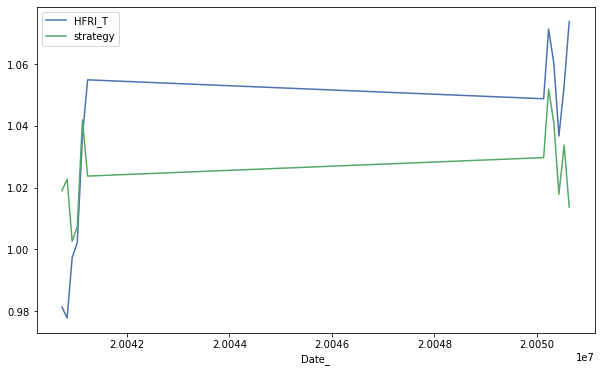

In [235]:
test_data[['HFRI_T', 'strategy']].cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));

In [236]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_data['HFRI_T'], test_data['strategy'])

0.0004968548165487